In [38]:
import numpy as np
import pandas as pd
import pvlib
from pvlib import solarposition

In [42]:
data = pd.read_csv('8966199_-23.56_-46.63_2019.csv', header = 2)
data['datetime'] = pd.to_datetime(data[['Year','Month', 'Day', 'Hour', 'Minute']])
data['datetime_utc'] = data['datetime'].dt.tz_localize('UTC')
data['datetime_local'] = data['datetime_utc'].dt.tz_convert('America/Sao_Paulo') # Fuso -2 até 16/02 (fim do horário de verão)
data['datetime_local'] = pd.to_datetime(data['datetime_local'])
display(data)

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Solar Zenith Angle,Wind Speed,Temperature,datetime,datetime_utc,datetime_local
0,2019,1,1,0,0,0,0,0,114.47,2.9,21.5,2019-01-01 00:00:00,2019-01-01 00:00:00+00:00,2018-12-31 22:00:00-02:00
1,2019,1,1,0,30,0,0,0,119.37,2.8,21.4,2019-01-01 00:30:00,2019-01-01 00:30:00+00:00,2018-12-31 22:30:00-02:00
2,2019,1,1,1,0,0,0,0,123.75,2.8,21.3,2019-01-01 01:00:00,2019-01-01 01:00:00+00:00,2018-12-31 23:00:00-02:00
3,2019,1,1,1,30,0,0,0,127.48,2.7,21.2,2019-01-01 01:30:00,2019-01-01 01:30:00+00:00,2018-12-31 23:30:00-02:00
4,2019,1,1,2,0,0,0,0,130.42,2.7,21.1,2019-01-01 02:00:00,2019-01-01 02:00:00+00:00,2019-01-01 00:00:00-02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2019,12,31,21,30,32,151,45,85.18,2.8,24.4,2019-12-31 21:30:00,2019-12-31 21:30:00+00:00,2019-12-31 18:30:00-03:00
17516,2019,12,31,22,0,0,0,0,91.58,3.0,23.3,2019-12-31 22:00:00,2019-12-31 22:00:00+00:00,2019-12-31 19:00:00-03:00
17517,2019,12,31,22,30,0,0,0,97.66,3.0,22.6,2019-12-31 22:30:00,2019-12-31 22:30:00+00:00,2019-12-31 19:30:00-03:00
17518,2019,12,31,23,0,0,0,0,103.55,3.0,22.0,2019-12-31 23:00:00,2019-12-31 23:00:00+00:00,2019-12-31 20:00:00-03:00


Kt = G0/GHI 

G0 = Irradiância Extraterrestre

GHI = Irradiância Global Horizontal

In [ ]:
def classify_day(kt):
    if kt > 0.65:
        return 'Ensolarado'
    elif 0.50 < kt <= 0.65:
        return 'Parcialmente Ensolarado'
    elif 0.35 < kt <= 0.50:
        return 'Parcialmente Nublado'
    else:
        return 'Nublado'

In [43]:
latitude = -23.55052
longitude = -46.633308
altitude = 590
albedo = 0.08 
solpos = solarposition.get_solarposition(data['datetime_utc'], latitude, longitude,altitude = altitude) 
display(solpos)
zenith = solpos['zenith']
zenith = zenith.values
zenith = pd.Series(zenith).reset_index(drop=True)
display(zenith)


,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
datetime_utc,,,,,,
2019-01-01 00:00:00+00:00,114.476095,114.476095,-24.476095,-24.476095,228.129189,-3.195874
2019-01-01 00:30:00+00:00,119.374683,119.374683,-29.374683,-29.374683,222.677718,-3.205782
2019-01-01 01:00:00+00:00,123.756554,123.756554,-33.756554,-33.756554,216.419942,-3.215687
2019-01-01 01:30:00+00:00,127.491193,127.491193,-37.491193,-37.491193,209.279223,-3.225590
2019-01-01 02:00:00+00:00,130.431269,130.431269,-40.431269,-40.431269,201.247715,-3.235491
...,...,...,...,...,...,...
2019-12-31 21:30:00+00:00,85.161122,85.330101,4.838878,4.669899,246.845935,-3.032026
2019-12-31 22:00:00+00:00,91.579861,91.579861,-1.579861,-1.579861,243.925505,-3.041970
2019-12-31 22:30:00+00:00,97.666672,97.666672,-7.666672,-7.666672,240.669099,-3.051912


0        114.476095
1        119.374683
2        123.756554
3        127.491193
4        130.431269
            ...    
17515     85.330101
17516     91.579861
17517     97.666672
17518    103.550002
17519    109.177629
Length: 17520, dtype: float64

In [44]:
zenith = data['Solar Zenith Angle']
display(zenith)

0        114.47
1        119.37
2        123.75
3        127.48
4        130.42
          ...  
17515     85.18
17516     91.58
17517     97.66
17518    103.55
17519    109.17
Name: Solar Zenith Angle, Length: 17520, dtype: float64

In [45]:
dni_extra = []
for i, row in data.iterrows():
    dniextra = pvlib.irradiance.get_extra_radiation(row['datetime_utc'])
    dni_extra.append(dniextra)

display(dni_extra)

[1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1413.981805,
 1414.0080167304782,
 1414.0080167304782,
 1414.0080167304782,
 1414.0080167304782,
 1414.0080167304782,
 1414.0080167304782,
 1414.0080167304782,
 1414.0080167304782,
 1414.0080167304782,
 1414.0080167304782,
 1414.0080167304782,
 1414.0080167304782,
 1414.0080167304782,
 1414.0080167304782,
 1414.0080167304782,
 1414.0080167

In [46]:
# Irradiância extraterrestre 
g0 = np.zeros_like(zenith) #Inicializa um array só de zeros no mesmo formato do array zenith

valid_indices = zenith[zenith <= 90].index #Pega os indices cujos valores de zenite <= a 90 (período diurno)
print(valid_indices)
for index in valid_indices:
    g0[index] = dni_extra[index]*np.cos(np.radians(zenith[index])) #Calcula g0 para os indices válidos

g0[g0 == 0] = np.nan #Substitui zero por nan
data['Kt'] = data['GHI'] / g0
data['date'] = data['datetime_local'].dt.date
daily_kt = data.groupby('date')['Kt'].mean() #Média diária do indice kt

Index([   17,    18,    19,    20,    21,    22,    23,    24,    25,    26,
       ...
       17506, 17507, 17508, 17509, 17510, 17511, 17512, 17513, 17514, 17515],
      dtype='int64', length=8783)


In [36]:
data.to_csv('teste.csv')

In [47]:
display(daily_kt)

date
2018-12-31         NaN
2019-01-01    0.435067
2019-01-02    0.537809
2019-01-03    0.457906
2019-01-04    0.289591
                ...   
2019-12-27    0.620799
2019-12-28    0.583706
2019-12-29    0.572420
2019-12-30    0.661252
2019-12-31    0.524524
Name: Kt, Length: 366, dtype: float64

In [48]:
daily_kt.to_csv('kt.csv')

In [4]:
data = pd.read_csv('irradiancias.csv')

display(data)

,Unnamed: 0,Real,Predito,Datetime,Theta,GHI,DNI,DHI,datetime_utc,datetime_local,irradiancias IA,irradiancias SPA
0,0,15.0,15.00,2019-10-20 00:00:00,0.000000,0,0,0,2019-10-20 00:00:00+00:00,2019-10-19 21:00:00-03:00,0.000000,0.000000
1,1,15.0,15.00,2019-10-20 00:30:00,0.000000,0,0,0,2019-10-20 00:30:00+00:00,2019-10-19 21:30:00-03:00,0.000000,0.000000
2,2,15.0,15.00,2019-10-20 01:00:00,0.000000,0,0,0,2019-10-20 01:00:00+00:00,2019-10-19 22:00:00-03:00,0.000000,0.000000
3,3,15.0,15.00,2019-10-20 01:30:00,0.000000,0,0,0,2019-10-20 01:30:00+00:00,2019-10-19 22:30:00-03:00,0.000000,0.000000
4,4,15.0,15.00,2019-10-20 02:00:00,0.000000,0,0,0,2019-10-20 02:00:00+00:00,2019-10-19 23:00:00-03:00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3499,3499,55.0,52.87,2019-12-31 21:30:00,9.925587,45,151,32,2019-12-31 21:30:00+00:00,2019-12-31 18:30:00-03:00,26.371482,31.787461
3500,3500,15.0,15.00,2019-12-31 22:00:00,0.000000,0,0,0,2019-12-31 22:00:00+00:00,2019-12-31 19:00:00-03:00,0.000000,0.000000
3501,3501,15.0,15.00,2019-12-31 22:30:00,0.000000,0,0,0,2019-12-31 22:30:00+00:00,2019-12-31 19:30:00-03:00,0.000000,0.000000
3502,3502,15.0,15.00,2019-12-31 23:00:00,0.000000,0,0,0,2019-12-31 23:00:00+00:00,2019-12-31 20:00:00-03:00,0.000000,0.000000


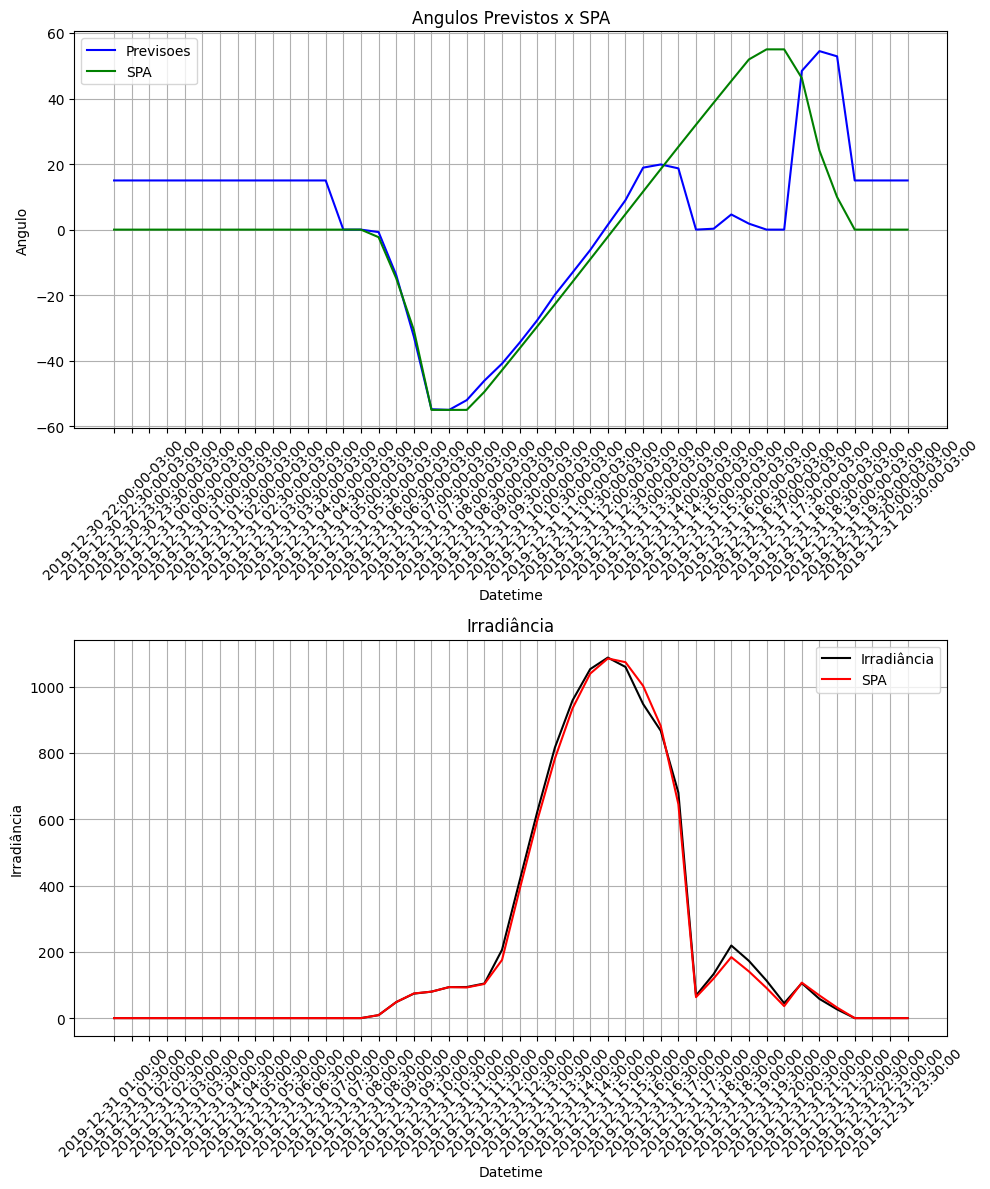

In [11]:
import matplotlib.pyplot as plt
# [2930:2978] 20/12 parcialmente nublado
# [3074:3122] 23/12 nublado
# [3458:3506] 31/12 parcialmente ensolarado
# [3170:3218] 25/12 ensolarado


plt.figure(figsize=(10, 12)) 

dates_desejados = data['datetime_local'][3458:3506]
dates = data['Datetime'][3458:3506]   
angulos_previstos = data['Predito'][3458:3506]    
angulos_SPA = data['Theta'][3458:3506]   
irradiancia_ia = data['irradiancias IA'][3458:3506]   
irradiancia_spa = data['irradiancias SPA'][3458:3506]      

# Primeiro subplot para Irradiância IA
plt.subplot(2, 1, 1)  # (número de linhas, número de colunas, índice do plot)
plt.plot(dates_desejados, angulos_previstos, label='Previsoes', color='blue')
plt.plot(dates_desejados, angulos_SPA , label='SPA', color='green')
plt.xlabel('Datetime')
plt.ylabel('Angulo')
plt.title('Angulos Previstos x SPA')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)  # Adicionar grade ao gráfico
plt.tight_layout()

# Segundo subplot para Irradiância SPA
plt.subplot(2, 1, 2)
plt.plot(dates, irradiancia_ia, label='Irradiância', color='black')
plt.plot(dates, irradiancia_spa , label='SPA', color='red')
plt.xlabel('Datetime')
plt.ylabel('Irradiância')
plt.title('Irradiância')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)  # Adicionar grade ao gráfico
plt.tight_layout()

# Exibir os gráficos
plt.show()